In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

,Unnamed: 0,creators,contact_info,country,total_subs,total_vids,total_views
0,0,www.youtube.com/@ai_with_gary,NaN,Соединенные Штаты,27700,48,699992
1,1,www.youtube.com/@Yourivanhofwegen,youribrands@gmail.com,Великобритания,245000,169,11587597
2,2,www.youtube.com/@razvanparaschiv,instagram.com/razvanparaschiv,Соединенные Штаты,60300,94,1291713
3,3,www.youtube.com/@JoeSappy,NaN,NaN,7730,51,315850
4,4,www.youtube.com/@BigStepsMedia,NaN,Соединенные Штаты,50100,68,2153687
...,...,...,...,...,...,...,...
106,106,www.youtube.com/@AIFromScratch-q2k,NaN,Соединенные Штаты,906,69,44437
107,107,www.youtube.com/@Rebelvids_01,NaN,NaN,97700,90,7997256
108,108,www.youtube.com/@editspro94,NaN,Германия,29400,31,1953656
109,109,www.youtube.com/@Bye9To5Official,support@bye9to5official.com,Соединенные Штаты,50700,125,1370061


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    111 non-null    int64 
 1   creators      111 non-null    object
 2   contact_info  33 non-null     object
 3   country       99 non-null     object
 4   total_subs    111 non-null    int64 
 5   total_vids    111 non-null    int64 
 6   total_views   111 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.2+ KB


In [5]:
df.isnull().sum()

Unnamed: 0       0
creators         0
contact_info    78
country         12
total_subs       0
total_vids       0
total_views      0
dtype: int64

In [17]:
df["creators"].duplicated().sum()

np.int64(0)

In [19]:
df["vpv_quality"] = df["total_views"] / df["total_vids"]

In [22]:
df["vpv_quality"].median()

np.float64(28512.775280898877)

In [23]:
df["vpv_quality"].mean()

np.float64(103163.91865076104)

In [30]:
df["loyalty"] = df["total_subs"]/df["total_views"] * 100

In [32]:
df["efficiency"] = df["total_subs"]/df["total_vids"]

In [33]:
df['subs_per_1k_views'] = (df['total_subs'] / df['total_views'].replace(0, 1)) * 1000

In [39]:
df['subs_per_video'] = (df['total_subs'] / df['total_vids'].replace(0, 1))

In [43]:
df

,Unnamed: 0,creators,contact_info,country,total_subs,total_vids,total_views,vpv_quality,loyalty,efficiency,subs_per_1k_views,subs_per_video
0,0,www.youtube.com/@ai_with_gary,NaN,Соединенные Штаты,27700,48,699992,14583.166667,3.957188,577.083333,39.571881,577.083333
1,1,www.youtube.com/@Yourivanhofwegen,youribrands@gmail.com,Великобритания,245000,169,11587597,68565.662722,2.114330,1449.704142,21.143297,1449.704142
2,2,www.youtube.com/@razvanparaschiv,instagram.com/razvanparaschiv,Соединенные Штаты,60300,94,1291713,13741.627660,4.668220,641.489362,46.682196,641.489362
3,3,www.youtube.com/@JoeSappy,NaN,NaN,7730,51,315850,6193.137255,2.447364,151.568627,24.473643,151.568627
4,4,www.youtube.com/@BigStepsMedia,NaN,Соединенные Штаты,50100,68,2153687,31671.867647,2.326243,736.764706,23.262433,736.764706
...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,www.youtube.com/@AIFromScratch-q2k,NaN,Соединенные Штаты,906,69,44437,644.014493,2.038842,13.130435,20.388415,13.130435
107,107,www.youtube.com/@Rebelvids_01,NaN,NaN,97700,90,7997256,88858.400000,1.221669,1085.555556,12.216690,1085.555556
108,108,www.youtube.com/@editspro94,NaN,Германия,29400,31,1953656,63021.161290,1.504871,948.387097,15.048709,948.387097
109,109,www.youtube.com/@Bye9To5Official,support@bye9to5official.com,Соединенные Штаты,50700,125,1370061,10960.488000,3.700565,405.600000,37.005652,405.600000


In [52]:
df['efficiency_by_video'] = df['total_views'] / df['total_vids'].replace(0, 1)

In [44]:
def get_cpm(country):
    tier_1 = ['Соединенные Штаты', 'Великобритания', 'Канада', 'Германия']
    if country in tier_1:
        return 15.0  # $15 за 1000 просмотров
    return 5.0

In [45]:
df['cpm'] = df['country'].apply(get_cpm)
df['est_revenue'] = (df['total_views'] / 1000) * df['cpm']

In [46]:
# Допустим, блогер берет $20 за каждую 1000 подписчиков
df['est_cost'] = (df['total_subs'] / 1000) * 20

In [47]:
df['roi'] = ((df['est_revenue'] - df['est_cost']) / df['est_cost']) * 100

In [48]:
df['ltv_per_sub'] = df['est_revenue'] / df['total_subs'].replace(0, 1)

In [49]:
print("Топ-5 каналов по окупаемости (ROI):")
print(df.sort_values('roi', ascending=False)[['creators', 'roi', 'est_revenue']].head())

Топ-5 каналов по окупаемости (ROI):
                             creators           roi  est_revenue
56      www.youtube.com/@LogicWolf-07  41234.510490    11821.670
101  www.youtube.com/@heygen_official  37891.726801   548600.535
94    www.youtube.com/@itsalways_dawn  32589.236542    63155.605
74       www.youtube.com/@DetailVideo  26377.721698    84199.155
82        www.youtube.com/@zebracatai  24496.267773    10379.625


In [50]:
country_roi = df.groupby('country')['roi'].mean().sort_values(ascending=False)

In [58]:
scaler = MinMaxScaler()
cols_to_score = ['roi', 'total_subs', 'efficiency']
df_norm = pd.DataFrame(scaler.fit_transform(df[cols_to_score]), columns=cols_to_score)

In [59]:
df['score'] = (df_norm['roi'] * 0.4 + 
               df_norm['total_subs'] * 0.3 + 
               df_norm['efficiency'] * 0.3) * 100

df = df.sort_values('score', ascending=False)

In [63]:
sns.set_theme(style="whitegrid")

C:\Users\User\AppData\Local\Temp\ipykernel_19524\576715137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_roi, x='roi', y='creators', palette='Reds_r')


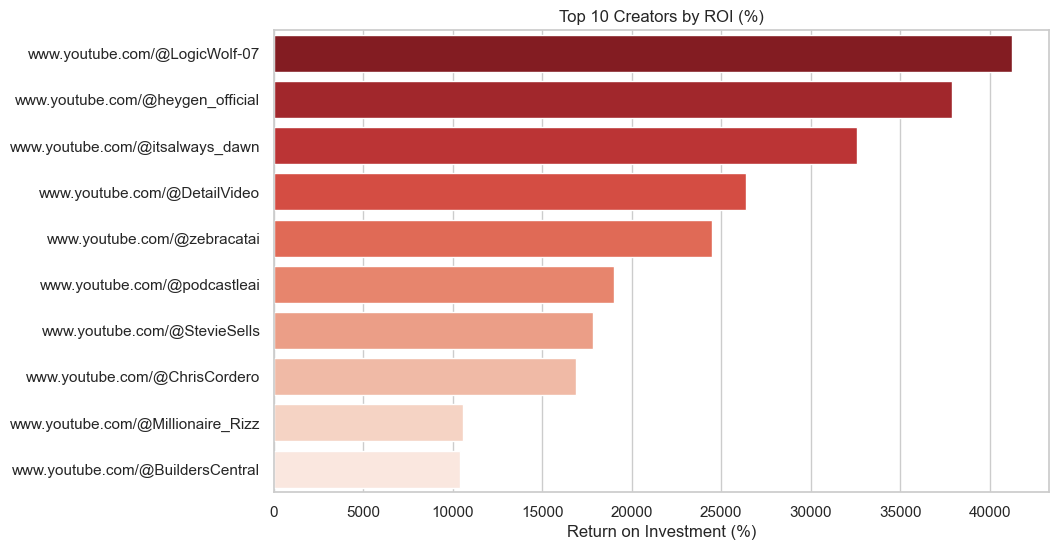

In [65]:
plt.figure(figsize=(10, 6))
top_roi = df.sort_values('roi', ascending=False).head(10)
sns.barplot(data=top_roi, x='roi', y='creators', palette='Reds_r')
plt.title('Top 10 Creators by ROI (%)')
plt.xlabel('Return on Investment (%)')
plt.ylabel('')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19524\2029018014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ltv_per_sub', y='country', palette='Set3')


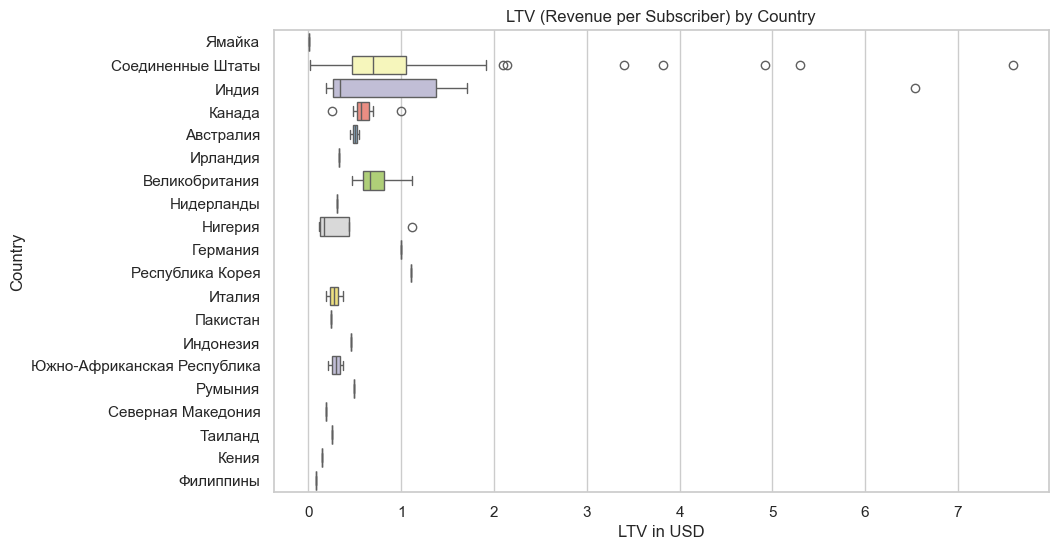

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ltv_per_sub', y='country', palette='Set3')
plt.title('LTV (Revenue per Subscriber) by Country')
plt.xlabel('LTV in USD')
plt.ylabel('Country')
plt.show()

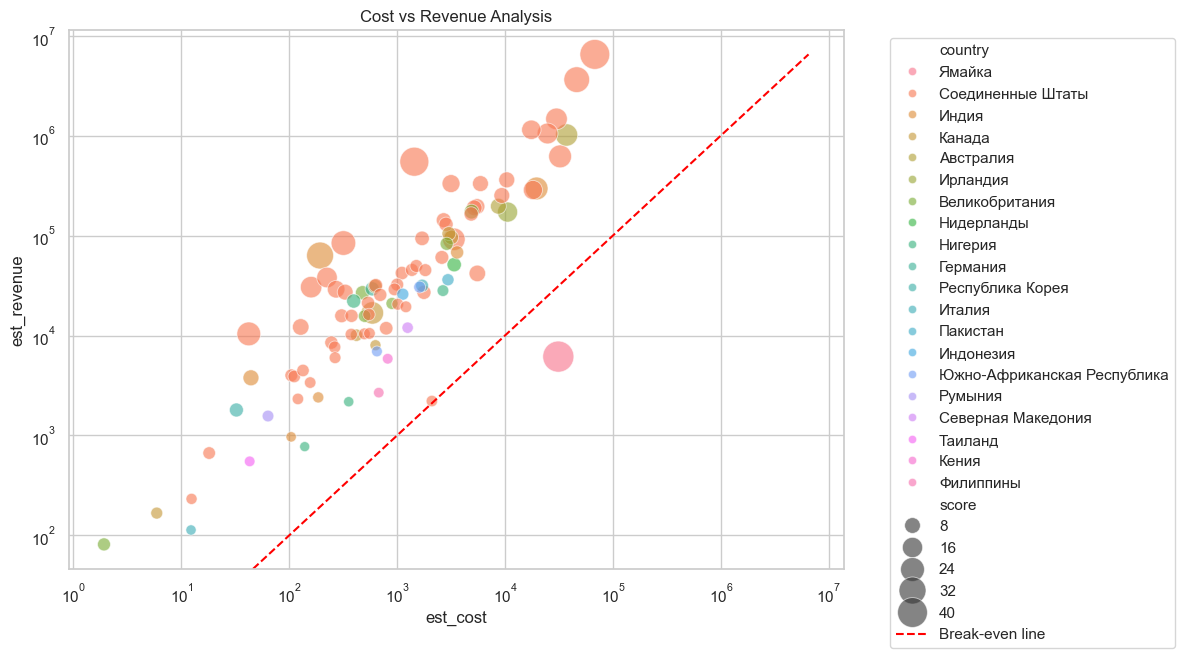

In [69]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='est_cost', y='est_revenue', size='score', hue='country', sizes=(50, 500), alpha=0.6)
# Линия окупаемости (Revenue = Cost)
max_val = max(df['est_cost'].max(), df['est_revenue'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Break-even line')

plt.title('Cost vs Revenue Analysis')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19524\1530230195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(10), x='score', y='creators', palette='viridis')


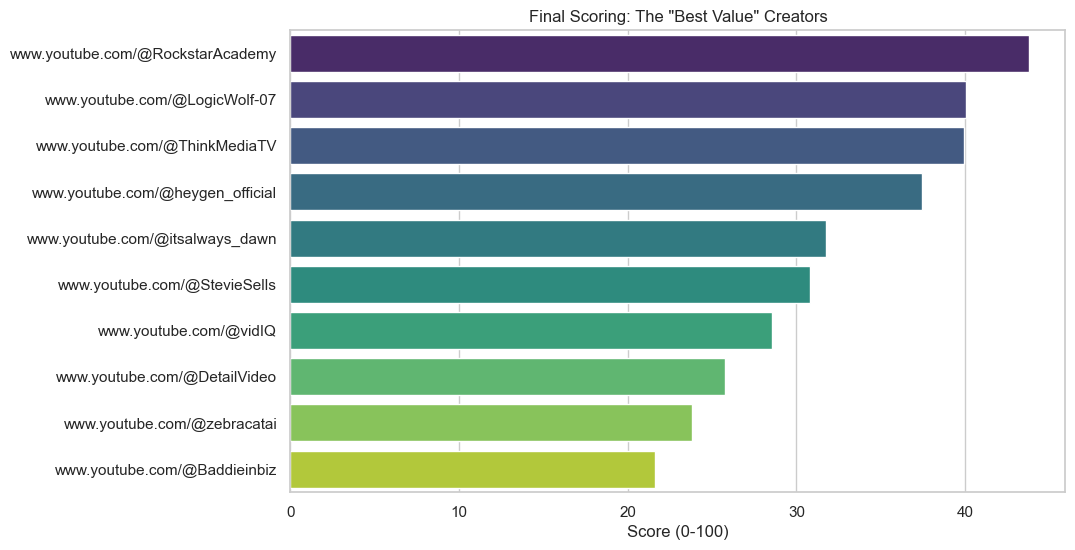

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df.head(10), x='score', y='creators', palette='viridis')
plt.title('Final Scoring: The "Best Value" Creators')
plt.xlabel('Score (0-100)')
plt.ylabel('')
plt.show()

In [72]:
df

,Unnamed: 0,creators,contact_info,country,total_subs,total_vids,total_views,vpv_quality,loyalty,efficiency,subs_per_1k_views,subs_per_video,cpm,est_revenue,est_cost,roi,ltv_per_sub,efficiency_by_video,score
46,46,www.youtube.com/@RockstarAcademy,rockstaracademycollab@gmail.com,Ямайка,1560000,31,1229955,39675.967742,126.833909,50322.580645,1268.339086,50322.580645,5.0,6149.775,31200.00,-80.289183,0.003942,39675.967742,43.764247
56,56,www.youtube.com/@LogicWolf-07,NaN,NaN,1430,19,2364334,124438.631579,0.060482,75.263158,0.604821,75.263158,5.0,11821.670,28.60,41234.510490,8.266902,124438.631579,40.055133
36,36,www.youtube.com/@ThinkMediaTV,NaN,Соединенные Штаты,3400000,2893,433484980,149839.260283,0.784341,1175.250605,7.843409,1175.250605,15.0,6502274.700,68000.00,9462.168676,1.912434,149839.260283,39.937936
101,101,www.youtube.com/@heygen_official,NaN,Соединенные Штаты,72200,596,36573369,61364.713087,0.197411,121.140940,1.974114,121.140940,15.0,548600.535,1444.00,37891.726801,7.598345,61364.713087,37.470541
94,94,www.youtube.com/@itsalways_dawn,varsharawatx@gmail.com,Индия,9660,219,12631121,57676.351598,0.076478,44.109589,0.764778,44.109589,5.0,63155.605,193.20,32589.236542,6.537847,57676.351598,31.739032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,63,www.youtube.com/@SuccessAmarachi001,successamarachi01.business@gmail.com,Нигерия,17800,71,434901,6125.366197,4.092886,250.704225,40.928855,250.704225,5.0,2174.505,356.00,510.816011,0.122163,6125.366197,0.876468
83,83,www.youtube.com/@CiCithecreator,NaN,NaN,1250,30,40788,1359.600000,3.064627,41.666667,30.646269,41.666667,5.0,203.940,25.00,715.760000,0.163152,1359.600000,0.804231
84,84,www.youtube.com/@MediaMastery12,NaN,NaN,11500,22,157599,7163.590909,7.297001,522.727273,72.970006,522.727273,5.0,787.995,230.00,242.606522,0.068521,7163.590909,0.723379
65,65,www.youtube.com/@DivineKennedy1,NaN,Нигерия,6960,40,154509,3862.725000,4.504592,174.000000,45.045920,174.000000,5.0,772.545,139.20,454.989224,0.110998,3862.725000,0.681038


In [77]:
df['contact_info'] = df['contact_info'].fillna('')

# Ищем @ (почта) или https (ссылки на инсту/тг)
df['has_email'] = df['contact_info'].str.contains('@').astype(int)
df['has_link'] = df['contact_info'].str.contains('https').astype(int)

# Общий флаг: "Можно ли с ним связаться вообще?" (0 или 1)
# Используем макс, чтобы если есть и то и то, оставалась 1
df['is_contactable'] = ((df['has_email'] + df['has_link']) > 0).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_19524\3099873121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='is_contactable', y='roi', palette='coolwarm')


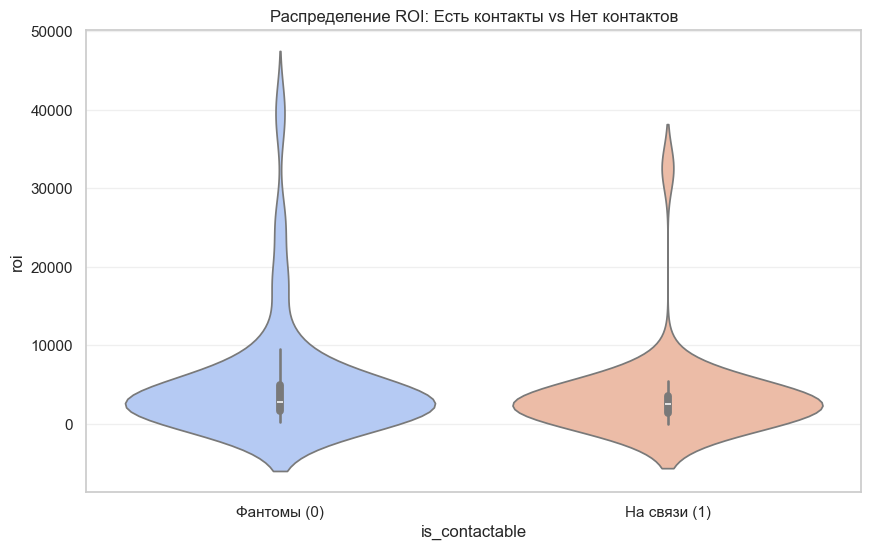

In [78]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='is_contactable', y='roi', palette='coolwarm')
plt.xticks([0, 1], ['Фантомы (0)', 'На связи (1)'])
plt.title('Распределение ROI: Есть контакты vs Нет контактов')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [88]:
df[df["has_email"]==1]["contact_info"].count()

np.int64(29)

In [87]:
df[df["has_link"]==1]["contact_info"].count()

np.int64(3)